# Weather prediction using Random Forest Classifier.

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle-weather-prediction-dataset/seattle-weather.csv


In [70]:
df=pd.read_csv('/kaggle/input/seattle-weather-prediction-dataset/seattle-weather.csv')
pd.set_option('display.max_rows', None)  # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns

# Now print the DataFrame
# print(df)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [34]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temp_max', ylabel='Count'>

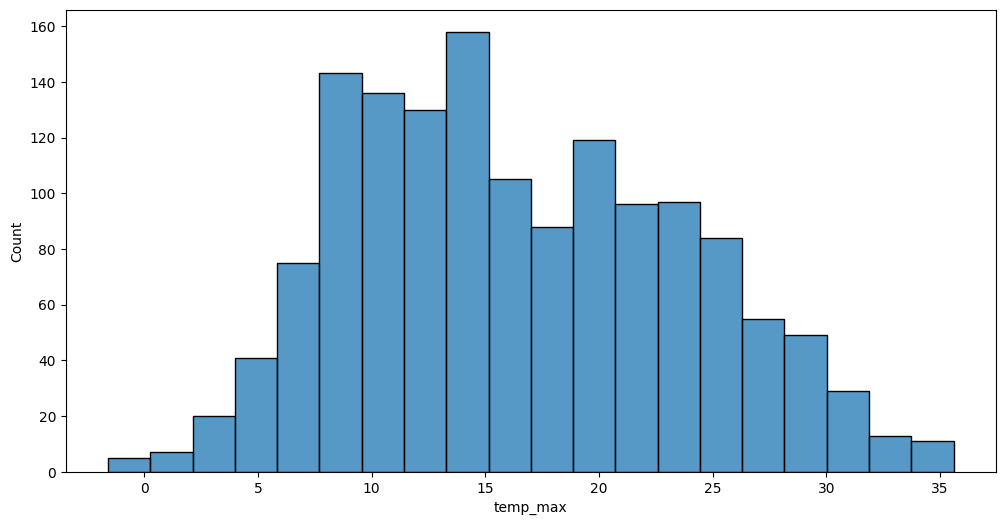

In [35]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_max,bins=20)

In [36]:
df.duplicated().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='temp_min', ylabel='Count'>

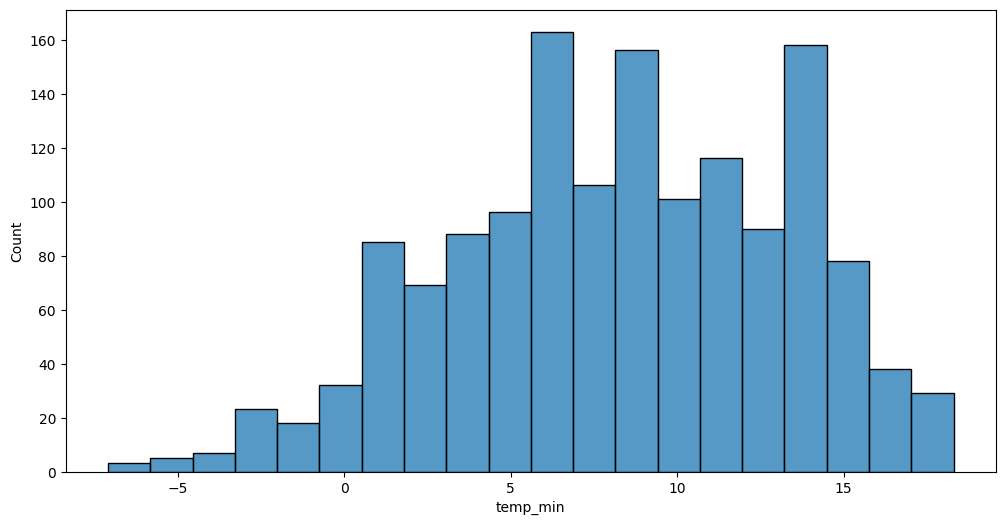

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_min,bins=20)

In [38]:
df.loc[:,['date','temp_max']]
df['date'] = pd.to_datetime(df['date'])

# Max temperature in each month in each year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

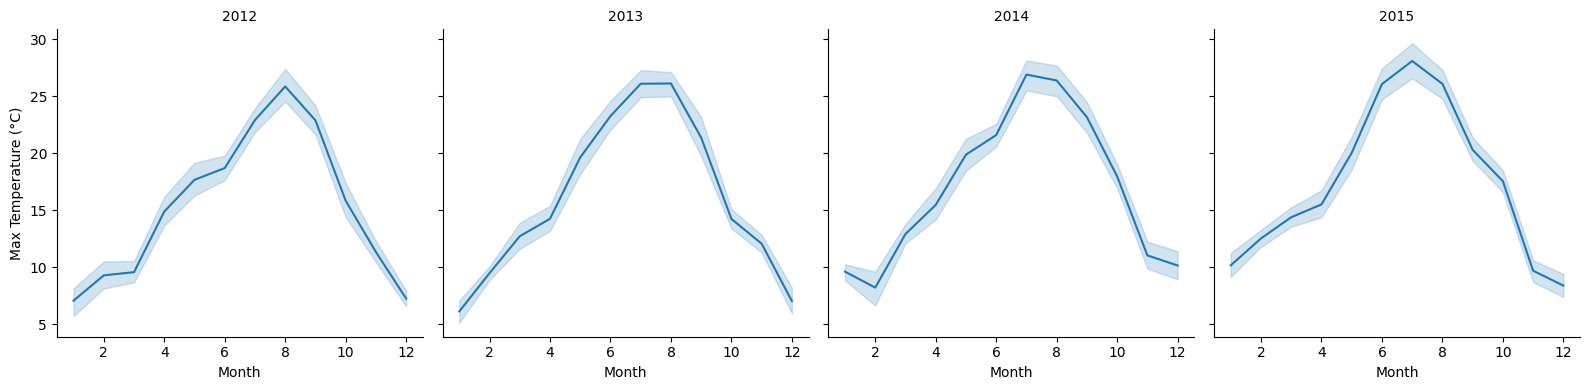

In [39]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

# Min temperature in each month in each year

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

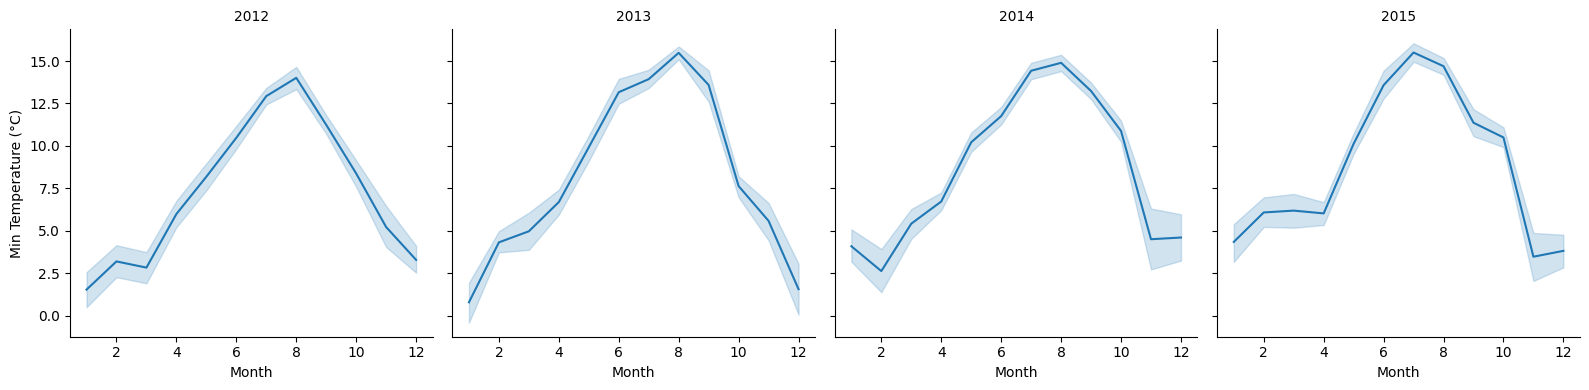

In [40]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

# Precipitation in each month in each year

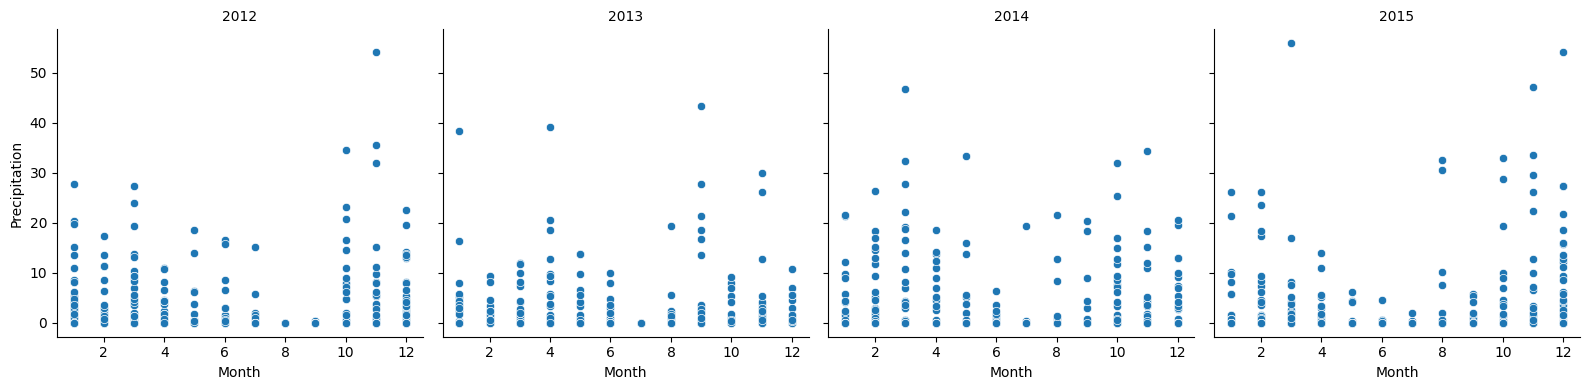

In [41]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

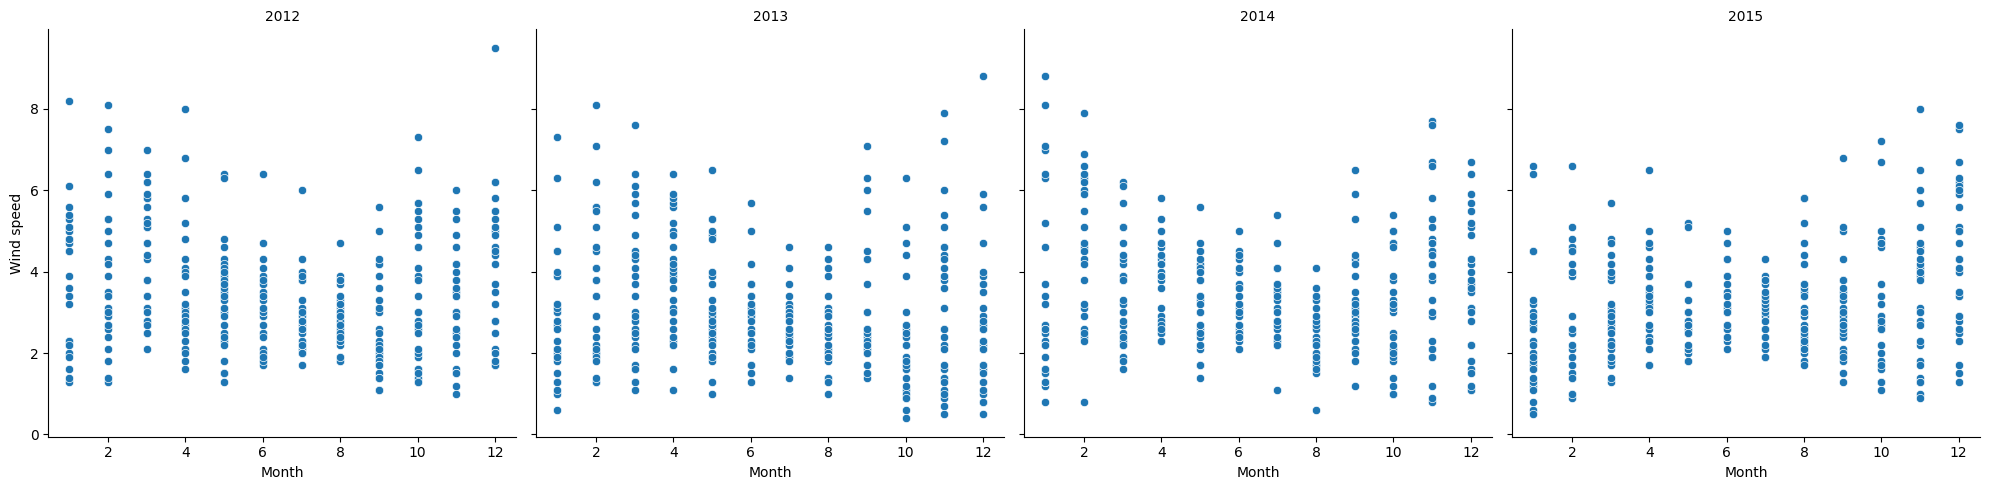

In [42]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

In [43]:
df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

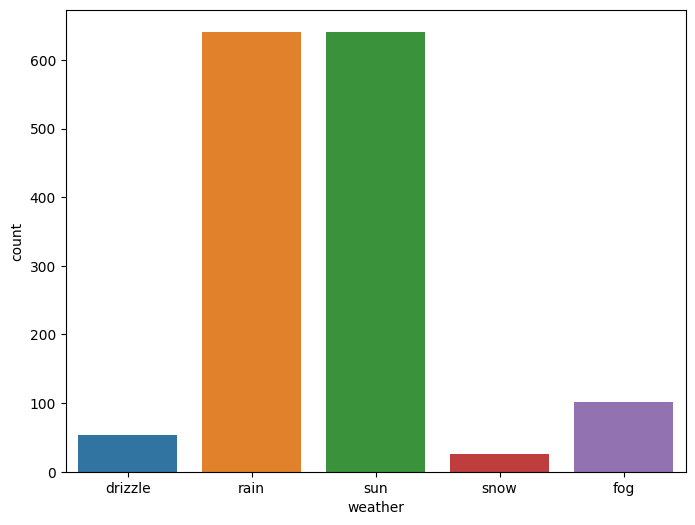

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x=df.weather)

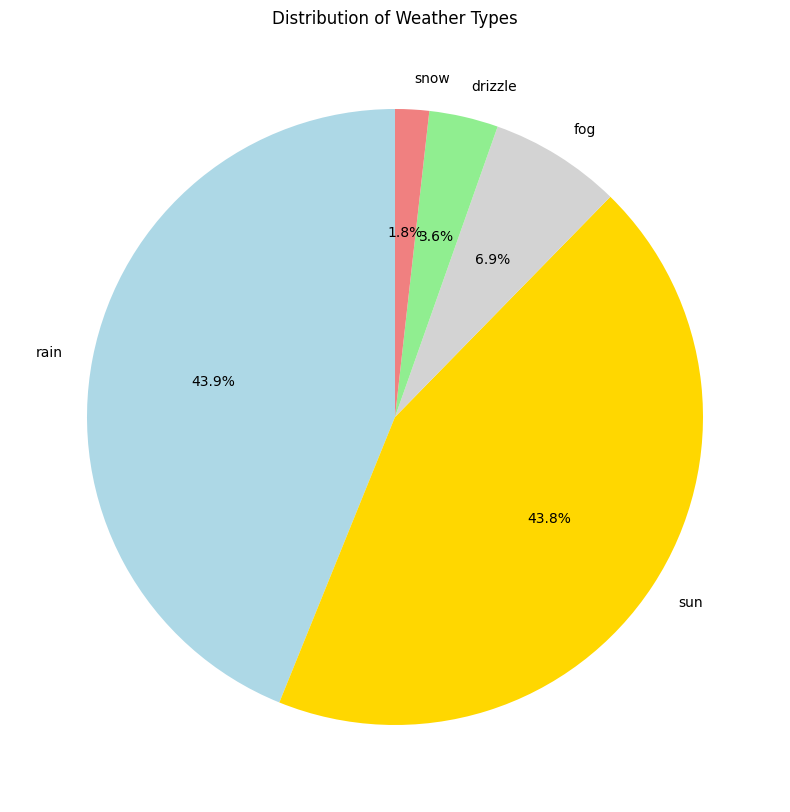

In [45]:
x=df.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

In [46]:
df.drop('month',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)

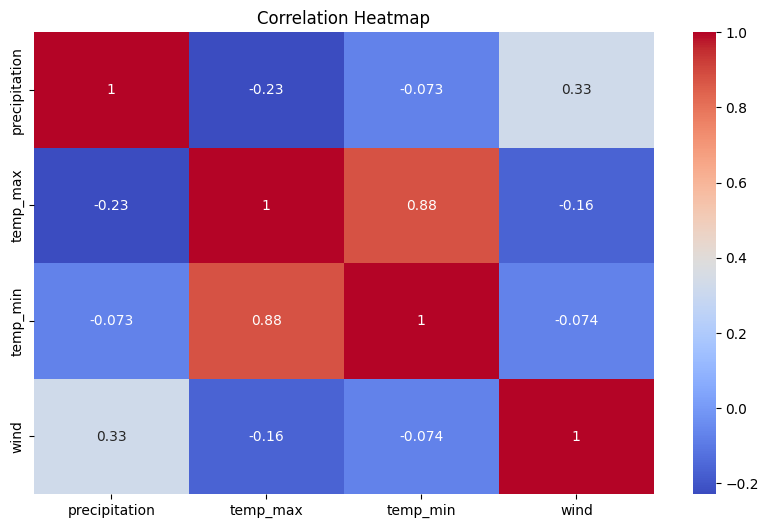

In [47]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Predicting Weather Type

In [48]:
import numpy as np
import pandas as pd
from collections import Counter
from random import sample

# Custom label encoder
class LabelEncoderCustom:
    def __init__(self):
        self.label_to_int = {}
        self.int_to_label = {}

    def fit_transform(self, y):
        unique_labels = np.unique(y)
        self.label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
        self.int_to_label = {idx: label for label, idx in self.label_to_int.items()}
        return np.array([self.label_to_int[label] for label in y])

    def inverse_transform(self, y_encoded):
        return np.array([self.int_to_label.get(idx, None) for idx in y_encoded])

# Load data
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']].values
y = df['weather'].values

# Encode y
le_custom = LabelEncoderCustom()
y_encoded = le_custom.fit_transform(y)

# Define Decision Tree Node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

# Define Decision Tree
class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        # Stopping criteria
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        # Find best split
        best_feat, best_thresh = self._best_split(X, y, n_features)
        
        # Grow the children recursively
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            # If split is empty, create a leaf node with the most common label
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)
        
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, n_features):
        best_gini = float("inf")
        split_idx, split_thresh = None, None
        for feat_idx in range(n_features):
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gini = self._gini_index(y, X_column, threshold)
                if gini < best_gini:
                    best_gini = gini
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _gini_index(self, y, X_column, threshold):
        left_idxs, right_idxs = self._split(X_column, threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        left_gini = self._gini(y[left_idxs])
        right_gini = self._gini(y[right_idxs])
        return (len(left_idxs) * left_gini + len(right_idxs) * right_gini) / len(y)

    def _gini(self, y):
        proportions = np.bincount(y) / len(y)
        return 1 - sum(p ** 2 for p in proportions)

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _most_common_label(self, y):
        if len(y) == 0:  # Safety check
            return None
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

# Define Random Forest
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        idxs = sample(range(n_samples), n_samples)
        return X[idxs], y[idxs]

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return [self._most_common_label(tree_pred) for tree_pred in tree_preds.T]

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]



In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare data for prediction
X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = df['weather']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Single new prediction
x_new = pd.DataFrame([[ 2 ,  12  , 2   , 5  ]], columns=['precipitation', 'temp_max', 'temp_min', 'wind'])
y_new_pred = model.predict(x_new)
print("Prediction for new data point:", y_new_pred)

# Evaluate on the test set
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


Prediction for new data point: ['rain']
Accuracy: 0.8156996587030717
Classification Report:
               precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.40      0.08      0.13        25
        rain       0.92      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.78      0.82      0.78       293

Confusion Matrix:
 [[  1   0   0   0   8]
 [  1   2   2   0  20]
 [  0   0 110   3   7]
 [  0   0   6   2   0]
 [  3   3   1   0 124]]


In [ ]:
# 1. Sunny Day
# Precipitation: 0 mm (no precipitation)
# Wind Speed: Light to moderate (0-4.2 m/s)
# Temperature:
# Minimum: 10°C and above
# Maximum: 15°C and above
    
    
# 2. Drizzle
# Precipitation: Light, typically between 0.1 mm and 2 mm per hour
# Wind Speed: Light to moderate (0-4.2 m/s)
# Temperature:
# Minimum: 5°C and above
# Maximum: 10°C to 20°C
    
    
    
# 3. Rain
# Precipitation: Moderate to heavy, typically 2 mm per hour and above
# Wind Speed: Moderate to strong (4.2-13.9 m/s)
# Temperature:
# Minimum: 5°C and above
# Maximum: 10°C to 30°C
    
    
# 4. Fog
# Precipitation: None or very light (usually below 0.1 mm per hour)
# Wind Speed: Very light (0-2.8 m/s)
# Temperature:
# Minimum: Close to the dew point, often between 0°C and 15°C
# Maximum: 10°C and below
# Additional Factor: High humidity, typically above 90%
    
    
# 5. Snow
# Precipitation: Light to heavy snow, typically 1 mm or more per hour
# Wind Speed: Light to moderate (0-5.6 m/s)
# Temperature:
# Minimum: -5°C to 0°C or below
# Maximum: -1°C to 5°C
# This should provide the ranges you're looking for in meters per second. For example:

# Light winds: 0-2.8 m/s (calm or light breeze)
# Moderate winds: 2.8-8.4 m/s (breezy to gusty)
# Strong winds: 8.4-13.9 m/s (windy or stormy conditions)